In [2]:
import numpy as np
from matplotlib import pyplot as plt
import os
import pickle

import tensorflow as tf
# from tensorflow.keras import datasets as K_datasets
# from tensorflow.keras import models as K_models
# from tensorflow.keras import layers as K_layers
# from tensorflow.keras import utils as K_utils
# from tensorflow.keras import optimizers as K_optimizers
# from tensorflow.keras import backend as K_backend

# Inputs to eager execution function cannot be Keras symbolic tensors
from keras import datasets as K_datasets
from keras import models as K_models
from keras import layers as K_layers
from keras import utils as K_utils
from keras import optimizers as K_optimizers
from keras import backend as K_backend

In [3]:
def load_mnist():
    (x_train, y_train), (x_test, y_test) = K_datasets.mnist.load_data()

    x_train = x_train.astype('float32') / 255.
    x_train = x_train.reshape(x_train.shape + (1,))
    x_test = x_test.astype('float32') / 255.
    x_test = x_test.reshape(x_test.shape + (1,))

    return (x_train, y_train), (x_test, y_test)
(X_train, y_train), (X_test, y_test) = load_mnist()
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(60000, 28, 28, 1) (60000,) (10000, 28, 28, 1) (10000,)


In [4]:
from Autoencoder import Autoencoder
vae = Autoencoder(
        input_dim=[28, 28, 1],
        encoder_conv_settings=[
            [32, 3, 1],
            [64, 3, 2],
            [64, 3, 2],
            [64, 3, 1],
        ],
        decoder_conv_settings=[
            [64, 3, 1],
            [64, 3, 2],
            [32, 3, 2],
            [1, 3, 1],
        ],
        z_dim=3, 
    is_variational=True
    )
vae.compile(0.0005, 1000)

In [7]:
vae.train(X_train, batch_size=128, epochs=200, run_folder='tmp')

Epoch 1/200
60000/60000 [==============================] - 85s 1ms/step - loss: 44.0414 - __r_loss: 0.0380 - __kl_loss: 6.0512

Epoch 00001: saving model to tmp\weights/weights-001-44.04.h5

Epoch 00001: saving model to tmp\weights/weights.h5
Epoch 2/200
60000/60000 [==============================] - 90s 2ms/step - loss: 43.6058 - __r_loss: 0.0374 - __kl_loss: 6.1628

Epoch 00002: saving model to tmp\weights/weights-002-43.61.h5

Epoch 00002: saving model to tmp\weights/weights.h5
Epoch 3/200
60000/60000 [==============================] - 92s 2ms/step - loss: 43.1825 - __r_loss: 0.0369 - __kl_loss: 6.2428

Epoch 00003: saving model to tmp\weights/weights-003-43.18.h5

Epoch 00003: saving model to tmp\weights/weights.h5
Epoch 4/200
60000/60000 [==============================] - 90s 1ms/step - loss: 42.8456 - __r_loss: 0.0365 - __kl_loss: 6.3201: 4s - loss: 42.8368 - __r_loss: 

Epoch 00004: saving model to tmp\weights/weights-004-42.85.h5

Epoch 00004: saving model to tmp\weights/weight

60000/60000 [==============================] - 89s 1ms/step - loss: 39.9057 - __r_loss: 0.0330 - __kl_loss: 6.9287: 3s - loss: 39.9073 - __r_loss: 0.0330 - _

Epoch 00034: saving model to tmp\weights/weights-034-39.91.h5

Epoch 00034: saving model to tmp\weights/weights.h5
Epoch 35/200
60000/60000 [==============================] - 90s 1ms/step - loss: 39.8724 - __r_loss: 0.0329 - __kl_loss: 6.9245

Epoch 00035: saving model to tmp\weights/weights-035-39.87.h5

Epoch 00035: saving model to tmp\weights/weights.h5
Epoch 36/200
60000/60000 [==============================] - 89s 1ms/step - loss: 39.8167 - __r_loss: 0.0329 - __kl_loss: 6.9514

Epoch 00036: saving model to tmp\weights/weights-036-39.82.h5

Epoch 00036: saving model to tmp\weights/weights.h5
Epoch 37/200
60000/60000 [==============================] - 89s 1ms/step - loss: 39.7664 - __r_loss: 0.0328 - __kl_loss: 6.9453

Epoch 00037: saving model to tmp\weights/weights-037-39.77.h5

Epoch 00037: saving model to tmp\weights/weigh

60000/60000 [==============================] - 89s 1ms/step - loss: 38.9771 - __r_loss: 0.0319 - __kl_loss: 7.1119

Epoch 00067: saving model to tmp\weights/weights-067-38.98.h5

Epoch 00067: saving model to tmp\weights/weights.h5
Epoch 68/200
60000/60000 [==============================] - 90s 2ms/step - loss: 38.9733 - __r_loss: 0.0319 - __kl_loss: 7.1124

Epoch 00068: saving model to tmp\weights/weights-068-38.97.h5

Epoch 00068: saving model to tmp\weights/weights.h5
Epoch 69/200
60000/60000 [==============================] - 89s 1ms/step - loss: 38.9252 - __r_loss: 0.0318 - __kl_loss: 7.1128

Epoch 00069: saving model to tmp\weights/weights-069-38.93.h5

Epoch 00069: saving model to tmp\weights/weights.h5
Epoch 70/200
60000/60000 [==============================] - 90s 1ms/step - loss: 38.9291 - __r_loss: 0.0318 - __kl_loss: 7.1186

Epoch 00070: saving model to tmp\weights/weights-070-38.93.h5

Epoch 00070: saving model to tmp\weights/weights.h5
Epoch 71/200
60000/60000 [===========

Epoch 00099: saving model to tmp\weights/weights.h5
Epoch 100/200
60000/60000 [==============================] - 89s 1ms/step - loss: 38.5153 - __r_loss: 0.0313 - __kl_loss: 7.2025

Epoch 00100: saving model to tmp\weights/weights-100-38.52.h5

Epoch 00100: saving model to tmp\weights/weights.h5
Epoch 101/200
60000/60000 [==============================] - 89s 1ms/step - loss: 38.4867 - __r_loss: 0.0313 - __kl_loss: 7.2026

Epoch 00101: saving model to tmp\weights/weights-101-38.49.h5

Epoch 00101: saving model to tmp\weights/weights.h5
Epoch 102/200
60000/60000 [==============================] - 90s 1ms/step - loss: 38.4844 - __r_loss: 0.0313 - __kl_loss: 7.2097

Epoch 00102: saving model to tmp\weights/weights-102-38.48.h5

Epoch 00102: saving model to tmp\weights/weights.h5
Epoch 103/200
60000/60000 [==============================] - 89s 1ms/step - loss: 38.4612 - __r_loss: 0.0312 - __kl_loss: 7.2161

Epoch 00103: saving model to tmp\weights/weights-103-38.46.h5

Epoch 00103: saving 

Epoch 133/200
60000/60000 [==============================] - 89s 1ms/step - loss: 38.1605 - __r_loss: 0.0309 - __kl_loss: 7.2680

Epoch 00133: saving model to tmp\weights/weights-133-38.16.h5

Epoch 00133: saving model to tmp\weights/weights.h5
Epoch 134/200
60000/60000 [==============================] - 89s 1ms/step - loss: 38.1756 - __r_loss: 0.0309 - __kl_loss: 7.2790

Epoch 00134: saving model to tmp\weights/weights-134-38.18.h5

Epoch 00134: saving model to tmp\weights/weights.h5
Epoch 135/200
60000/60000 [==============================] - 90s 1ms/step - loss: 38.1438 - __r_loss: 0.0309 - __kl_loss: 7.2752

Epoch 00135: saving model to tmp\weights/weights-135-38.14.h5

Epoch 00135: saving model to tmp\weights/weights.h5
Epoch 136/200
60000/60000 [==============================] - 89s 1ms/step - loss: 38.1668 - __r_loss: 0.0309 - __kl_loss: 7.2845

Epoch 00136: saving model to tmp\weights/weights-136-38.17.h5

Epoch 00136: saving model to tmp\weights/weights.h5
Epoch 137/200
60000/

Epoch 166/200
60000/60000 [==============================] - 89s 1ms/step - loss: 37.9556 - __r_loss: 0.0306 - __kl_loss: 7.3254

Epoch 00166: saving model to tmp\weights/weights-166-37.96.h5

Epoch 00166: saving model to tmp\weights/weights.h5
Epoch 167/200
60000/60000 [==============================] - 89s 1ms/step - loss: 37.8598 - __r_loss: 0.0305 - __kl_loss: 7.3155

Epoch 00167: saving model to tmp\weights/weights-167-37.86.h5

Epoch 00167: saving model to tmp\weights/weights.h5
Epoch 168/200
60000/60000 [==============================] - 90s 2ms/step - loss: 37.9346 - __r_loss: 0.0306 - __kl_loss: 7.3318

Epoch 00168: saving model to tmp\weights/weights-168-37.93.h5

Epoch 00168: saving model to tmp\weights/weights.h5
Epoch 169/200
60000/60000 [==============================] - 90s 1ms/step - loss: 37.8935 - __r_loss: 0.0306 - __kl_loss: 7.3222

Epoch 00169: saving model to tmp\weights/weights-169-37.89.h5

Epoch 00169: saving model to tmp\weights/weights.h5
Epoch 170/200
60000/

60000/60000 [==============================] - 90s 2ms/step - loss: 37.7308 - __r_loss: 0.0304 - __kl_loss: 7.3777

Epoch 00198: saving model to tmp\weights/weights-198-37.73.h5

Epoch 00198: saving model to tmp\weights/weights.h5
Epoch 199/200
60000/60000 [==============================] - 89s 1ms/step - loss: 37.7540 - __r_loss: 0.0304 - __kl_loss: 7.3605

Epoch 00199: saving model to tmp\weights/weights-199-37.75.h5

Epoch 00199: saving model to tmp\weights/weights.h5
Epoch 200/200
60000/60000 [==============================] - 89s 1ms/step - loss: 37.6954 - __r_loss: 0.0303 - __kl_loss: 7.3715: 3s - loss: 37.6906 - __r_loss: 0.0303 

Epoch 00200: saving model to tmp\weights/weights-200-37.70.h5

Epoch 00200: saving model to tmp\weights/weights.h5


In [8]:
model = vae

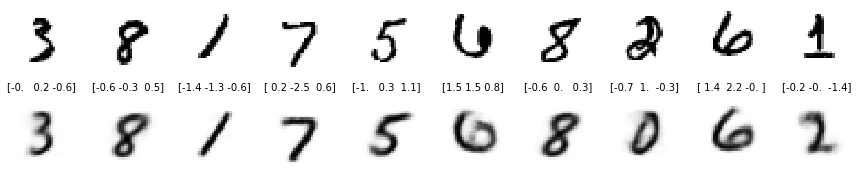

In [24]:
# pick some images from test set, and have a peek

n_to_show = 10
example_idx = np.random.choice(range(len(X_test)), n_to_show)
example_images = X_test[example_idx]

z_points = model.encoder.predict(example_images)

new_images = model.decoder.predict(z_points)

# can i use AE.model.predict() ?
# new_images = model.model.predict(example_images)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i in range(n_to_show):
    img = example_images[i].squeeze()
    ax = fig.add_subplot(2, n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, 
            str(np.round(z_points[i], 1)),
            fontsize=10,
            ha='center',
            transform=ax.transAxes
           )
    ax.imshow(img, cmap='gray_r')

for i in range(n_to_show):
    img = new_images[i].squeeze()
    ax = fig.add_subplot(2, n_to_show, i+n_to_show+1)
    ax.axis('off')
    ax.imshow(img, cmap='gray_r')


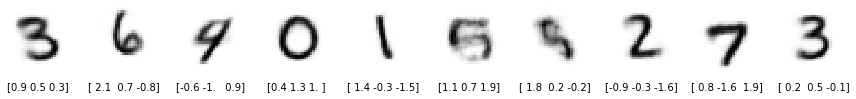

In [13]:
# randomly pick some images 
test_points = np.random.normal(0, 1, z_points.shape)
new_images = model.decoder.predict(test_points)
fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(n_to_show):
    img = new_images[i].squeeze()
    ax = fig.add_subplot(2, n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, 
            str(np.round(test_points[i], 1)),
            fontsize=10,
            ha='center',
            transform=ax.transAxes
           )
    ax.imshow(img, cmap='gray_r')